# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:
# Write your code here
import re
import pandas as pd


# Load the dataset
df = pd.read_csv("avatar_2_movie_reviews.csv")

# Function to tokenize text
def tokenize(text):
    tokens = re.findall(r'\w+', text.lower())
    return tokens

# Function to count ngram frequencies
def count_ngrams(tokens, n):
    ngrams = {}
    for i in range(len(tokens) - n + 1):
        ngram = tuple(tokens[i:i+n])
        ngrams[ngram] = ngrams.get(ngram, 0) + 1
    return ngrams

# Function to calculate bigram probabilities
def calculate_bigram_probabilities(tokens):
    unigrams = count_ngrams(tokens, 1)
    bigrams = count_ngrams(tokens, 2)
    bigram_probs = {}
    for bigram, count in bigrams.items():
        w1, w2 = bigram
        unigram_count = unigrams.get((w1,), 0)
        if unigram_count > 0:
            bigram_probs[bigram] = count / unigram_count
    return bigram_probs

# Function to extract noun phrases and calculate relative probabilities
def extract_noun_phrases(reviews):
    noun_phrases = {}
    max_freq = 0
    for review in reviews:
        tokens = tokenize(review)
        ngrams = count_ngrams(tokens, 3)
        for ngram, freq in ngrams.items():
            if all(token[0].isupper() for token in ngram):
                noun_phrases[ngram] = noun_phrases.get(ngram, 0) + freq
                max_freq = max(max_freq, noun_phrases[ngram])

    relative_probs = {}
    for review in reviews:
        tokens = tokenize(review)
        ngrams = count_ngrams(tokens, 3)
        review_probs = {}
        for ngram, freq in ngrams.items():
            if ngram in noun_phrases:
                review_probs[ngram] = freq / max_freq
        relative_probs[review] = review_probs

    return noun_phrases, relative_probs

# Conduct N-gram analysis
reviews = df['review'].tolist()

# (1) Count the frequency of all the N-grams (N=3)
all_tokens = []
for review in reviews:
    all_tokens.extend(tokenize(review))
trigrams = count_ngrams(all_tokens, 3)
print("Trigram Frequencies:")
for trigram, freq in sorted(trigrams.items(), key=lambda x: x[1], reverse=True):
    #print(f"{trigram}: {freq}")
    print("The Trigram Frequencies" f"{trigram}: {freq}")



    # (2) Calculate the probabilities for all the bigrams
all_tokens = []
for review in reviews:
    all_tokens.extend(tokenize(review))
bigram_probs = calculate_bigram_probabilities(all_tokens)
print("\nBigram Probabilities:")
for bigram, prob in sorted(bigram_probs.items(), key=lambda x: x[1], reverse=True):
    #print(f"{bigram}: {prob:.5f}")
    print("Probabilities of bigrams" f"{bigram}: {prob:.5f}" )


# (3) Extract noun phrases and calculate relative probabilities
noun_phrases, relative_probs = extract_noun_phrases(reviews)
print("\nNoun Phrase Relative Probabilities:")
columns = sorted(noun_phrases.keys())
print("Review\t" + "\t".join(columns))
for review, probs in relative_probs.items():
    row = [review[:10] + "..."]
    for noun_phrase in columns:
        row.append(f"{probs.get(noun_phrase, 0):.5f}")
    print("\t".join(map(str, row)))

Streaming output truncated to the last 5000 lines.
Probabilities of bigrams('puerile', 'cheesy'): 1.00000
Probabilities of bigrams('undeveloped', 'characters'): 1.00000
Probabilities of bigrams('cartoonish', 'and'): 1.00000
Probabilities of bigrams('glowy', 'sprinkles'): 1.00000
Probabilities of bigrams('sprinkles', 'on'): 1.00000
Probabilities of bigrams('desperate', 'attempt'): 1.00000
Probabilities of bigrams('cute', 'and'): 1.00000
Probabilities of bigrams('lovable', 'over'): 1.00000
Probabilities of bigrams('ol', 'humans'): 1.00000
Probabilities of bigrams('franchise', 'to'): 1.00000
Probabilities of bigrams('replace', 'banal'): 1.00000
Probabilities of bigrams('banal', 'marvel'): 1.00000
Probabilities of bigrams('itself', 'with'): 1.00000
Probabilities of bigrams('projects', 'these'): 1.00000
Probabilities of bigrams('excrete', 'right'): 1.00000
Probabilities of bigrams('besides', 'em'): 1.00000
Probabilities of bigrams('funny', 'thing'): 1.00000
Probabilities of bigrams('dies', 

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [5]:
import re
import math
import pandas as pd

# Load the dataset
df = pd.read_csv("avatar_2_movie_reviews.csv")

# Function to tokenize text
def tokenize(text):
    tokens = re.findall(r'\w+', text.lower())
    return tokens

# Function to calculate term frequency (TF) for a term in a document
def calculate_tf(term, document):
    tokens = tokenize(document)
    term_count = tokens.count(term)
    total_terms = len(tokens)
    return term_count / total_terms

# Function to calculate inverse document frequency (IDF) for a term
def calculate_idf(term, documents):
    total_documents = len(documents)
    document_count = sum(1 for doc in documents if term in doc)
    return math.log(total_documents / (document_count + 1))  # Adding 1 to avoid division by zero

# Function to build the TF-IDF matrix
def build_tfidf_matrix(documents):
    terms = set()
    tfidf_matrix = {}
    for document in documents:
        tokens = tokenize(document)
        for term in tokens:
            terms.add(term)

    for document_index, document in enumerate(documents):
        tfidf_vector = {}
        for term in terms:
            tf = calculate_tf(term, document)
            idf = calculate_idf(term, documents)
            tfidf_vector[term] = tf * idf
        tfidf_matrix[document_index] = tfidf_vector

    return tfidf_matrix, list(terms)

# Function to calculate cosine similarity between two vectors
def cosine_similarity(vector1, vector2):
    dot_product = sum(vector1[term] * vector2[term] for term in vector1 if term in vector2)
    magnitude1 = math.sqrt(sum(value ** 2 for value in vector1.values()))
    magnitude2 = math.sqrt(sum(value ** 2 for value in vector2.values()))
    return dot_product / (magnitude1 * magnitude2)

# Function to rank documents based on cosine similarity to a query
def rank_documents(query_vector, document_vectors):
    similarities = {}
    for index, vector in document_vectors.items():
        similarity = cosine_similarity(query_vector, vector)
        similarities[index] = similarity
    return sorted(similarities.items(), key=lambda x: x[1], reverse=True)

# Step 1: Build the TF-IDF matrix
documents = df['review'].tolist()
tfidf_matrix, terms = build_tfidf_matrix(documents)

# Step 2: Design a query
query = "An Outstanding movie with a haunting performance and best character development"

# Step 3: Represent the query as a vector in the TF-IDF space
query_vector = {}
for term in tokenize(query):
    if term in terms:
        query_vector[term] = calculate_tf(term, query) * calculate_idf(term, documents)

# Step 4: Rank documents based on cosine similarity to the query
ranked_documents = rank_documents(query_vector, tfidf_matrix)

# Display the ranked documents
print("Ranked Documents:")
for index, similarity in ranked_documents:
    print(f"Document {index + 1}: Similarity = {similarity:.4f}")


Ranked Documents:
Document 17: Similarity = 0.1072
Document 42: Similarity = 0.1072
Document 67: Similarity = 0.1072
Document 92: Similarity = 0.1072
Document 117: Similarity = 0.1072
Document 142: Similarity = 0.1072
Document 167: Similarity = 0.1072
Document 192: Similarity = 0.1072
Document 217: Similarity = 0.1072
Document 242: Similarity = 0.1072
Document 267: Similarity = 0.1072
Document 292: Similarity = 0.1072
Document 317: Similarity = 0.1072
Document 342: Similarity = 0.1072
Document 367: Similarity = 0.1072
Document 392: Similarity = 0.1072
Document 417: Similarity = 0.1072
Document 442: Similarity = 0.1072
Document 467: Similarity = 0.1072
Document 492: Similarity = 0.1072
Document 517: Similarity = 0.1072
Document 542: Similarity = 0.1072
Document 567: Similarity = 0.1072
Document 592: Similarity = 0.1072
Document 617: Similarity = 0.1072
Document 642: Similarity = 0.1072
Document 667: Similarity = 0.1072
Document 692: Similarity = 0.1072
Document 717: Similarity = 0.1072


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

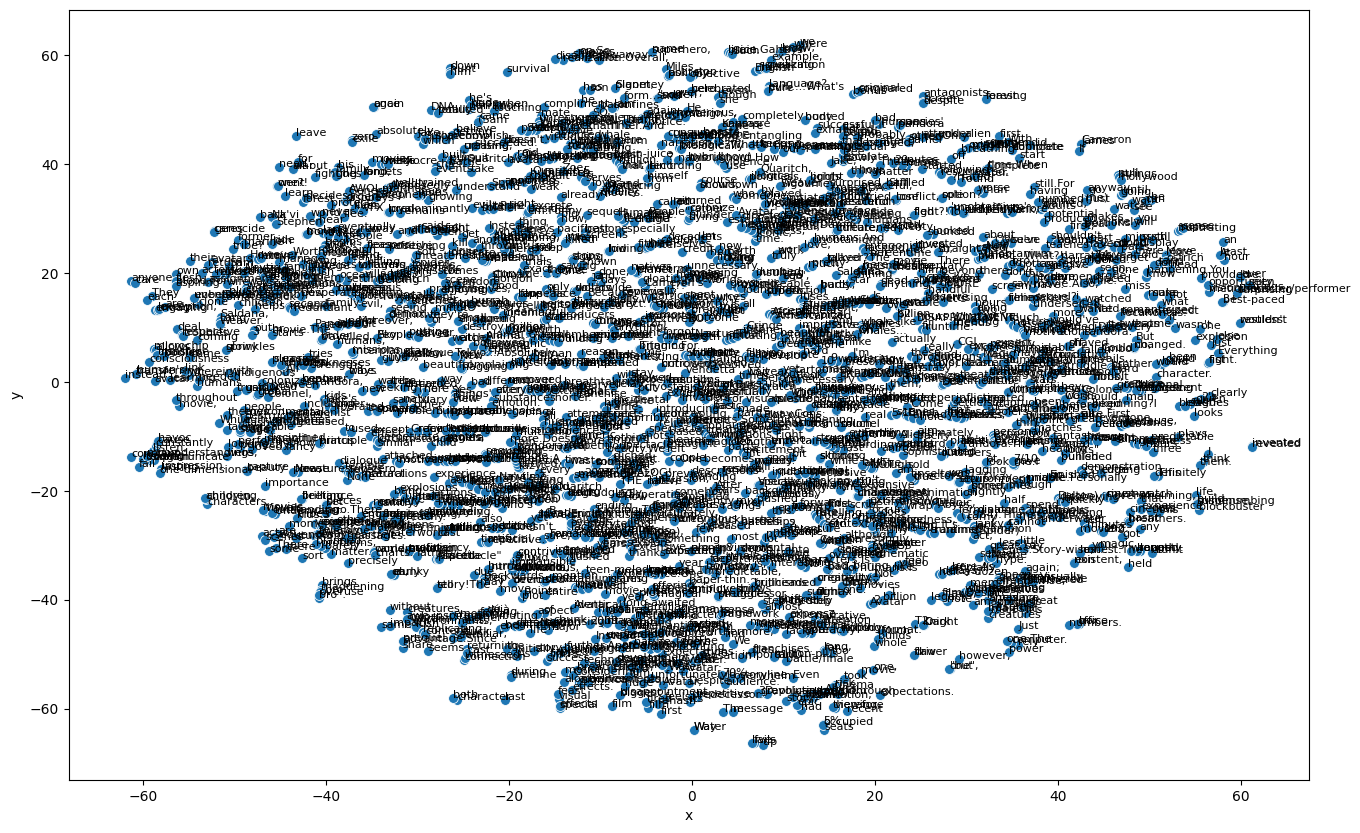

In [2]:
# Write your code here
import pandas as pd
import gensim
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("avatar_2_movie_reviews.csv")

# Tokenize the reviews
tokenized_reviews = []
for review in df['review']:
    tokenized_reviews.append(review.split())

# Train the Word2Vec model
model = Word2Vec(tokenized_reviews, vector_size=300, window=5, min_count=1, workers=4)

# Visualize the word embeddings
vocab = list(model.wv.index_to_key)
X = model.wv[vocab]

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

df_plot = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])

plt.figure(figsize=(16, 10))
sns.scatterplot(x='x', y='y', data=df_plot, s=50)

for word, pos in df_plot.iterrows():
    plt.annotate(word, pos, fontsize=8)

plt.show()






## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file

# Here is the link for the file
# Link: https://github.com/sushmitha3004/INFO_5731/blob/main/avatar_2_movie_reviews.csv



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Type your answer
'''Overall, I found this assignment to be a valuable learning experience that allowed me to apply my knowledge of natural language processing and data analysis in a practical setting. The task of creating a word embedding model and visualizing the resulting word representations was particularly engaging, as it enabled me to gain a deeper understanding of how semantic relationships are captured in the embedding space.

One of the more challenging aspects was the requirement to implement the algorithms from scratch, rather than relying on pre-existing libraries. While this presented an obstacle initially, it ultimately strengthened my understanding of the underlying principles and algorithms involved. Additionally, working with the real-world dataset of movie reviews added an element of complexity, as I had to address potential data quality issues and ensure my code could handle the nuances of the text.

In terms of the provided time to complete the assignment, I found it to be generally reasonable, though the requirement to build the models and visualizations from scratch did add an additional layer of complexity that may have required more time than anticipated. Overall, I believe the assignment struck a good balance between challenging the learner and providing an opportunity for meaningful exploration and discovery.'''